# Herhaling integreren

In [12]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from IPython.display import display, Markdown, Latex, HTML
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

md = lambda t: display(Markdown(t))

def _set_css_style(css_file_path):
   """
   Read the custom CSS file and load it into Jupyter.
   Pass the file path to the CSS file.
   """
   styles = open(css_file_path, "r").read()
   st = '<style>%s</style>' % styles     
   return HTML(st)

_set_css_style('styles.css')

## Integreren van Functies (symbolisch en numeriek)

In de cursus Analytical Computing hebben we kennis gemaakt met integreren en differentiëren. Op deze kennis zal in Simulation Modelling worden voortgebouwd. Omdat sommige kennis inmiddels misschien een beetje is weggezakt hier een herhaling.
Integreren gebruiken we wanneer we te maken hebben met een functie die een mate van verandering van een waarde uitdrukt (bijvoorbeeld een snelheid of versnelling) en hiermee uitspraken willen doen over de totale waarde na een bepaalde tijd (in dezelfde voorbeelden als zojuist: totaal afgelegde afstand en uiteindelijke snelheid). Meestal willen we dit weten tussen een gegeven begin- en eindpunt (zogenaamde definite integrals), maar in veel gevallen is het ook mogelijk een functie te vinden (de indefinite integral) die dit voor iedere waarde kan berekenen. In AC hebben we gezien hoe we dit numeriek kunnen doen (door middel van benadering door de computer) of symbolisch (waarbij we algebra gebruiken om indefinite integrals als functies te vinden). Hieronder staat een functie die, als we deze symbolisch willen integreren, vrij lastig is. In dit soort gevallen geeft numeriek integreren een oplossing.

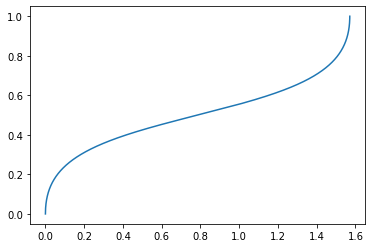

In [13]:
def fun(x):
    return math.sqrt(math.sin(x)) / (math.sqrt(math.sin(x)) + math.sqrt(math.cos(x)))

begin = 0
end = math.pi/2

x_curve = np.linspace(begin,end,10000)
y_curve = list(map(fun,x_curve))

plt.plot(x_curve, y_curve);

De totale waarde van een functie na een bepaalde tijd kunnen we visualiseren als de oppervlakte onder de grafiek van de functie tot het gewenste tijdspunt (op de x-as). In veel gevallen willen we ook het startpunt van de integratie bepalen (dus de totale verandering van de functie over een tijdspanne) en hebben we dus een begin- en eindpunt waartussen we de oppervlakte kunnen bepalen of benaderen.

Bij numeriek integreren laten we de computer de functie op een gegeven aantal punten uitrekenen, waarmee we de functie in een aantal (doorgaans gelijke) delen splitsen. Als we deze delen vermenigvuldigen met de afstand tussen de punten en dit bij elkaar optellen, dan benaderen we de oppervlakte onder de grafiek: de totale waarde die we zoeken. Hoe meer tussenliggende punten we uitrekenen, hoe beter deze benadering zal zijn. Visueel kunnen we dit zien als rechthoeken die we over de grafiek plotten. De som van deze rechthoeken noemen we de Riemann-som, en deze geeft een benadering van de oppervlakte onder de grafiek / integraal van de functie. Hieronder zien we een aantal variaties op de Riemann-som, waarbij het verschil is waar we de hoogte van de rechthoeken bepalen. 

In de laatste variant worden geen rechthoeken maar trapezia gebruikt in een poging om de benadering accurater te maken. Een trapezium is een vorm met ten minste twee parallelle zijden (de zijkanten van de kolom), en in dit geval rechte hoeken aan de onderkant. Alleen aan de bovenkant wijkt de vorm af van een rechthoek doordat een schuine zijde wordt toegelaten. De oppervlakte van zo'n trapezium is niet simpelweg $hoogte \times breedte$ zoals bij een rechthoek, maar $\frac{hoogte_1 + hoogte_2}{2} \times breedte$. Hier wordt dus de gemiddelde hoogte gebruikt.

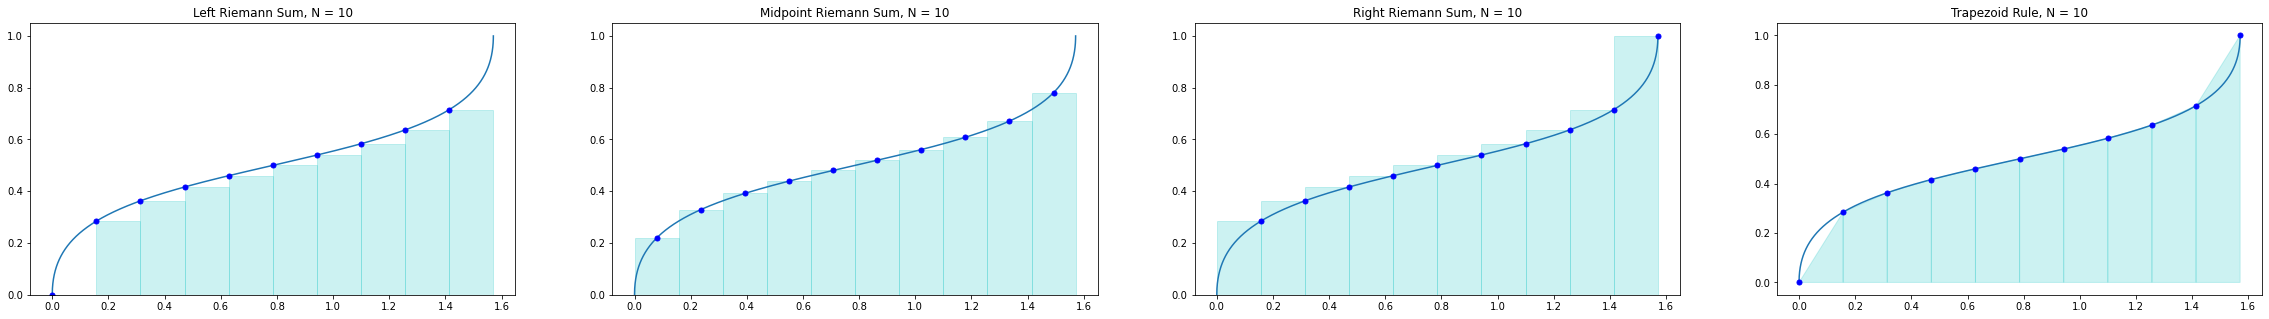

In [14]:
N = 10

x = np.linspace(begin,end,N+1)
y = list(map(fun,x))

plt.figure(figsize=(40,5))

plt.subplot(1,4,1)
plt.plot(x_curve, y_curve)
x_left = x[:-1] # Left endpoints
y_left = y[:-1]
plt.plot(x_left,y_left,'b.',markersize=10)
plt.bar(x_left,y_left,width=(end-begin)/N,alpha=0.2,align='edge',edgecolor='c',color='c')
plt.title('Left Riemann Sum, N = {}'.format(N))

plt.subplot(1,4,2)
plt.plot(x_curve, y_curve)
x_mid = (x[:-1] + x[1:])/2 # Midpoints
y_mid = list(map(fun,x_mid))
plt.plot(x_mid,y_mid,'b.',markersize=10)
plt.bar(x_mid,y_mid,width=(end-begin)/N,alpha=0.2,edgecolor='c',color='c')
plt.title('Midpoint Riemann Sum, N = {}'.format(N))

plt.subplot(1,4,3)
plt.plot(x_curve, y_curve)
x_right = x[1:] # Left endpoints
y_right = y[1:]
plt.plot(x_right,y_right,'b.',markersize=10)
plt.bar(x_right,y_right,width=-(end-begin)/N,alpha=0.2,align='edge',edgecolor='c',color='c')
plt.title('Right Riemann Sum, N = {}'.format(N))

plt.subplot(1,4,4)
plt.plot(x_curve, y_curve)
plt.plot(x,y,'b.',markersize=10)
for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,fun(x[i]),fun(x[i+1]),0]
    plt.fill(xs,ys,'b',alpha=0.2,edgecolor='c',color='c')

plt.title('Trapezoid Rule, N = {}'.format(N))

plt.show()

Hieronder de midpoint Riemann-sommen voor verschillende waardes van N; merk op dat de nauwkeurigheid toeneemt hoe meer rechthoeken we gebruiken. Bij oneindig veel, oneindig smalle rechthoeken hebben we een exacte waarde in plaats van een benadering.

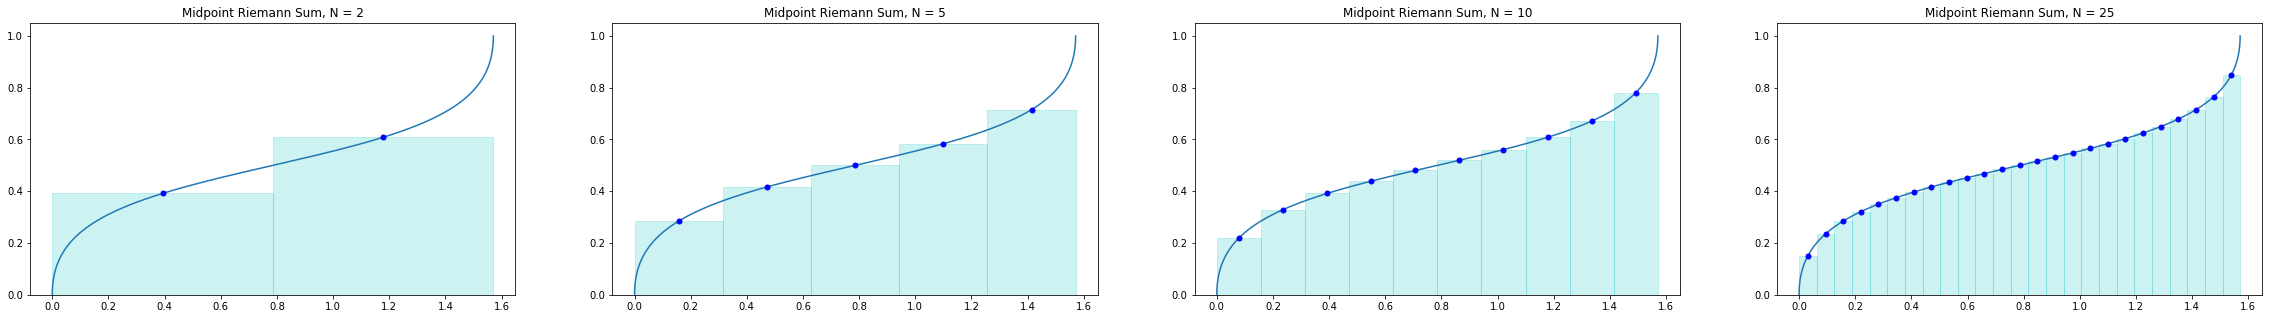

In [15]:
plt.figure(figsize=(40,5))

for i, N in enumerate([2,5,10,25]):
    x = np.linspace(begin,end,N+1)
    y = list(map(fun,x))

    plt.subplot(1,4,i+1)
    plt.plot(x_curve, y_curve)
    x_mid = (x[:-1] + x[1:])/2 # Midpoints
    y_mid = list(map(fun,x_mid))
    plt.plot(x_mid,y_mid,'b.',markersize=10)
    plt.bar(x_mid,y_mid,width=(end-begin)/N,alpha=0.2,edgecolor='c',color='c')
    plt.title('Midpoint Riemann Sum, N = {}'.format(N))

plt.show()

### Oefening
Hieronder staat de code voor het berekenen van de Left Riemann Sum van een meegegeven functie. Schrijf zelf varianten voor de Right Riemann Sum en de Trapezoid Rule.

In [ ]:
step_size = 0.01
begin = 0
end = math.pi/2 - step_size

def left_integral(fun, begin, end, step_size):
    left_integral = 0
    for x in np.arange(begin, end, step_size):
        left_integral += step_size * fun(x)
    return left_integral

def right_integral(fun, begin, end, step_size):
    pass

def trapezoid_integral(fun, begin, end, step_size):
    pass
   
def check_answer(integr):
    return f"Het berekende resultaat is ${integr:.4}$; het correcte antwoord is ${math.pi/4:.4}$. De afwijking is ${abs(math.pi/4 - integr):.4}$"

md(f"Left Riemann sum: {check_answer(left_integral(fun, begin, end, step_size))}")
md(f"Trapezoid Riemann sum: {check_answer(trapezoid_integral(fun, begin, end, step_size))}")
md(f"Right Riemann sum: {check_answer(right_integral(fun, begin, end, step_size))}")

### Oefeningen

Hieronder staan een aantal integralen van functies met daarbij intervallen. Gebruik Riemann sommen (variant naar keuze) zoals hierboven beschreven om de integralen van de functies over de bijbehorende intervallen te berekenen; doe dit in Python of een andere programmeertaal. Als extra kun je ook andere varianten van Riemann-sommen gebruiken en de resultaten vergelijken. 
Probeer daarnaast dezelfde integraal ook symbolisch te herleiden. Hoe klein moet de stapgrootte zijn om minder dan 0.001 af te wijken van het exacte antwoord? **De integralen lopen op in moeilijkheid, dus als je snel klaar bent met de eerste paar kun je je uitdagen met de latere integralen. Onhoud dat dit een oefening is, het is niet erg als de laatste integralen je nu niet lukken.**

#### Functie 1 op [-8, 64]
$$\int_{-8}^{64} \sqrt[3]{x}\ dx$$

**Hint:** Gebruik `numpy.cbrt` in plaats van `** (1/3)` om deze numeriek op te lossen. In sommige gevallen komt de laatste notatie met onnodig complexe wortels aanzetten, wat het leven niet eenvoudiger maakt.

#### Functie 1 op [8, 64] 
$$\int_8^{64} \sqrt[3]{x}\ dx$$

Dit is dezelfde functie als hierboven, maar toegepast op een kleiner interval.

#### Functie 1 op [-8, 8]
$$\int_{-8}^{8} \sqrt[3]{x}\ dx$$

Dit is wederom dezelfde functie, maar nu toegepast op de rest van het interval - het verschil tussen de eerste en tweede. De uitkomst van deze zou samen met de uitkomst van de vorige hetzelfde moeten zijn als de uitkomst van de eerste.

#### Functie 2
$$\int_0^\pi \cos x + \sin x \ dx$$

**Hint:** Besef dat je een integraal van een som kan opslitsen in een som van integralen.

#### Functie 3
$$\int_{-5}^{1} \frac{1}{8}x^4 + x^3 +2x^2 - \frac{2}{3} x\ dx$$

#### Functie 4
$$\int_{-3}^6 \frac{x-3}{\sqrt{(x-3)^2}}$$ 
 **Hint:** Voor deze functie (en de volgende twee) kun je het beste substitutie gebruiken. Neem in dit geval $u = (x-3)^2$. De gegeven functie is discontinu en niet gedefinieerd op $x=3$, wat betekent dat je waarschijnlijk warnings krijgt bij de Riemann-sommen hiervan. Zorg ervoor dat je functie de waarde $0$ geeft op $x=3$. Bij symbolische integratie kun je de discontinuiteit in dit geval veilig negeren.

#### Functie 5
$$\int_{\frac{7}{8}\pi}^{\frac{39}{8}\pi} 4 \sin(4x) - e \sin \frac{x}{2} + 7\ dx$$

 **Hint:** Zodra je de functie symbolisch geintegreerd hebt is het aan te raden hier een Python-functie van te maken en deze voor de twee randwaardes van het interval in te vullen.

#### Functie 6
$$\int_{-e}^{e} \frac{e^x}{1+e^x}\ dx$$

Dit is de logistic functie die je veel als activatie-functie bij neurale netwerken ziet. De integraal hiervan is een andere functie die binnen deze context gebruikt wordt als variant op een *rectified linear unit* of ReLU. 

**Hints:** Onthoud dat je het verschil van twee logaritmes (met dezelfde basis) kan schrijven als een enkel logaritme van een breuk. Ook zul je op het einde breuken moeten manipuleren om tot een exact antwoord te komen. Als dit niet lukt kun je ook hier een Python-functie introduceren om de uiteindelijke berekening te doen nadat je de integralen gevonden hebt.

## Numerieke Integratie van Data

Hieronder laden we een dataset met COVID-19 data voor Nederland in. De set bevat per week (gelabeled met het weeknummer) het gemiddelde aantal nieuwe gevallen, ziekenhuisopnames en overlijdens per dag. In week 10 zijn er dus, gemiddeld, per dag ongeveer 66.3 nieuwe gevallen gemeld. Wij zijn nu op zoek naar het totale aantal gevallen: na week 10 zijn er volgens deze data 7 × 66.3 = 464 gevallen gemeld. Na week 11 komen hier 7 × 631.6 = 4421 gevallen bij, en staat de teller op 464 + 4421 = 4885 totale meldingen.

In [ ]:
data = pd.read_json(r"COVID-19_weekgemiddeldes.json")
data.plot();
data[:5]

### Oefening

Ook hier kunnen we Riemann-sommen gebruiken om tot deze totalen te komen. Maak van onderstaande data een lijst met cumulatieve sommen. Rij 0 (label 10) bevat dus het aantal gevallen tot en met week 10, wat in dit geval 7× de originele rij is. De tweede rij (label 11) bevat de getallen van week 10 tot en met 11, dus van beide weken opgeteld. Let erop dat per week een gemiddelde per dag wordt gegeven, het totale aantal gevallen in die week is dus 7× de gegeven waarde.

In [ ]:
cumulative = None

In [ ]:
cumulative.plot();

## Vooruitblik Differentiaalvergelijkingen (symbolisch)

In de laatste opdracht van AC checkpoint Delta hebben we kennis gemaakt met differentiaalvergelijkingen. In SM gaan we hier dieper op in. Zie onderstaande als een vooruitblik, we zullen dit onderwerp nog verder verkennen in de komende lessen. Een differentiaalvergelijking is een vergelijking waar een relatie tussen een functie en de afgeleide van die functie wordt uitgedrukt. Differentiaalvergelijkingen komen op veel plaatsen terug, onder andere in de natuurkunde, finance en het modelleren van populaties en infecties. Om bij onze casus van COVID-19 te blijven zullen we kijken naar dat laatste. In dit geval is er een relatie tussen het aantal patienten en de verspreiding van het virus - de afgeleide van het aantal patienten. In een simpel model kunnen we bijvoorbeeld stellen dat de verspreiding alleen afhangt van het aantal patienten en een constante die bepaalt hoe besmettelijk een ziekte is:

$$ \frac{dI(t)}{dt} = rI(t) $$

De linkerkant van de vergelijking beschrijft de infectie-snelheid, oftewel het aantal nieuwe besmettingen over een verstreken hoeveelheid tijd. De variabele $I$ aan de rechterkant is het actuele aantal besmettingen, met een constant reproductiegetal $r$ dat ons in staat stelt het model te tweaken voor meer of minder besmettelijke ziektes.

Met symbolische manipulatie kunnen we dit omschrijven naar een 'normale' vergelijking:

<div class="hastooltip">
    <span class="tooltiptext"><em>Voor het overzicht schrijven we $I$ in plaats van $I(t)$, maar onthoud dat de waarde van $I$ afhangt van $t$ - het aantal geinfecteerde mensen is niet constant, maar varieert over tijd</em></span>
$$ \frac{dI}{dt} = rI $$</div>

<div class="hastooltip">
  <span class="tooltiptext">Deel beide kanten door $I$</span>
$$ \frac{1}{I} \frac{dI}{td} = r$$</div>

<div class="hastooltip">
  <span class="tooltiptext">Vermenigvuldig beide kanten met $dt$</span>
$$ \frac{1}{I}\ dI = r\ dt$$</div>

<div class="hastooltip">
  <span class="tooltiptext">Integreer beide kanten</span>
$$ \int \frac{1}{I}\ dI = \int r\ dt$$</div>

$$ \ln |I| + C_1 = rt + C_2 $$

<div class="hastooltip">
  <span class="tooltiptext">$C_1$ en $C_2$ zijn onbekende constanten. Trek van beide kanten $C_1$ af en definieer $C_3$ als $C_2 - C_1$</span>
$$ \ln |I| = rt + C_3 $$</div>

<div class="hastooltip">
  <span class="tooltiptext">Neem van beide kanten het $e$ tot de macht, en neem aan dat het aantal geinfecteerde mensen niet negatief kan zijn</span>
$$ e^{\ln I} = e^{rt + C_3} $$</div>

<div class="hastooltip">
  <span class="tooltiptext">Het natuurlijk logaritme en een exponent van $e$ heffen elkaar op</span>
$$ I = e^{rt + C_3} $$</div>

<div class="hastooltip">
  <span class="tooltiptext">Splits exponenten</span>
$$ I = e^{rt} \cdot e^{C_3} $$</div>

<div class="hastooltip">
  <span class="tooltiptext">Definieer $C$ als $e^{C_3}$</span>
$$ I = C \cdot e^{rt} $$</div>

Voor simpele differentiaalvergelijkingen is op deze manier een oplossing te vinden. Gecombineerd met twee bekende combinaties van $I$ en $t$ waardes kunnen we $r$ en $C$ invullen. Als we bijvoorbeeld beginnen met $100$ gevallen, en dit na een week verdubbeld is tot $200$ dan kunnen we stellen dat $t = 0 \to I = 100$ en $t = 7 \to I = 200$. Met deze informatie kunnen we met nog wat symbolische manipulatie tot een exacte formule komen:

$$I = C \cdot e^{rt}$$

<div class="hastooltip">
  <span class="tooltiptext">Vul $t = 0$ en $I = 100$ in</span>
$$100 = C \cdot e^{0}$$</div>

<div class="hastooltip">
  <span class="tooltiptext">Een getal tot de nulde macht staat per definitie gelijk aan $1$</span>
$$100 = C \cdot 1$$</div>

$$C = 100$$

en dus hebben we:

$$ I = 100 \cdot e^{rt} $$.

Hier kunnen we nu $t = 7$ en $I = 200$ invullen

$$ 200 = 100 e^{7r} $$

<div class="hastooltip">
  <span class="tooltiptext">Deel beide kanten door $100$</span>
$$ 2 = e^{7r} $$</div>

<div class="hastooltip">
  <span class="tooltiptext">Neem het natuurlijk logaritme van beide kanten</span>
$$ \ln 2 = 7r $$</div>

<div class="hastooltip">
  <span class="tooltiptext">Deel beide kanten door $c$ en keer om</span>
$$ r = \frac{\ln 2}{7} $$</div>

Als we dit invullen wordt de totale formule

$$ I(t) = 100 e^{\frac{\ln 2}{7}t} $$

## Numerieke oplossingen voor differentiaalvergelijkingen

De symbolische methode leent zich goed voor simpele modellen, maar dit wordt al vrij snel erg onoverzichtelijk (of in veel gevallen zelfs onmogelijk). Een alternatief is een numerieke aanpak: we hoeven geen perfecte formules te vinden, zolang we maar weten wat onze vergelijking doet bij de waardes waar we iets over willen zeggen. In AC hebben we in de laatste opdracht kennis gemaakt met de methode van Euler.

In [ ]:
# We gebruiken de r-constante en vergelijking van het voorbeeld hierboven
r = math.log(2)/7
dIdt = lambda t, I: r * I

def euler(dif_eq, initial_t, initial_I, delta_t, target_t):
    t = initial_t
    I = initial_I
    while t < target_t:
        I += delta_t * dif_eq(t,I)
        t += delta_t
    return I

actual = 100*math.e**(math.log(2)/7*7)
for delta_t in [1,0.5,0.2,0.1,0.01]:
    approx = euler(dIdt, 0, 100, delta_t, 7)
    md(f"Met $\delta_t={delta_t}$ komen we uit op $I(7) = {approx:.2f}$, zou moeten zijn ${actual:.0f}$. De afwijking is ${abs(approx-actual):.2f}$.")

## Differentiaalvergelijkingen in Actie: Het SIR-model

Een voorbeeld van een complexer model voor epidemien is het zogenaamde SIR-model. Dit staat voor susceptible, infected en removed. Suspceptible betekent dat iemand niet ziek is, maar wel vatbaar is voor het virus. Infected betekent dat iemand ziek is en anderen (suspceptibles) kan besmetten. Removed is soms ook wel "recovered", en slaat op alle mensen die de ziekte gehad hebben en niet meer vatbaar en/of besmettelijk zijn.

We definieren twee constanten die we kunnen tweaken: $\tau$ staat voor transmission, oftewel hoe makkelijk het virus van een infected persoon naar een susceptible persoon kan overspringen. $\rho$ staat voor de recovery rate, die vertelt hoe lang het duurt voordat iemand van infected naar removed gaat. We drukken beide uit als getallen die bepalen hoe zwaar respectievelijk het aantal susceptibles en het aantal infected doorstromen naar de volgende categorie.

<img width=50% src="illustrations/sir.webp" style="margin-left: auto; margin-right: auto; margin-bottom: 40px" />

De waarde $\frac{dS}{dt}$ staat voor de afname van het aantal vatbare mensen per (oneindig kleine) tijdseenheid, oftewel de rate waarin mensen de sus-categorie verlaten. Deze is negatief (mensen kunnen vanuit susceptible naar infected, maar niemand keert terug in deze begincategorie) en hangt af van het aantal vatbaren, het aantal besmettingen en de constante $\tau$.

$$\frac{dS}{dt} = - \tau S I$$

De waarde $\frac{dI}{dt}$ staat voor de toe-/afname van het aantal geinfecteerde mensen. De formule hiervoor bestaat uit twee delen: enerzijds komen er mensen bij, die voorheen nog sus waren, anderzijds verdwijnen er mensen naar de recovered categorie. Het eerste deel komt overeen met de vorige vergelijking (alles dat niet meer susceptible is wordt namelijk infected), het tweede deel hangt af van de recovery rate $\rho$ en het aantal infected gevallen. Die laatste is negatief, omdat ook hier weer alleen mensen van susceptible naar removed gaan, en niet vice versa.

$$\frac{dI}{dt} =   \tau S I - \rho I$$

De verandering van de laatste variabele, removed, wordt uitgedrukt met $\frac{dR}{dt}$. Ook hier komt het negatieve deel van de vorige vergelijking terug, maar nu positief. Iedereen die van infected naar removed gaat komt hier immers binnen. 

$$\frac{dR}{dt} =              \rho I$$

Tot slot werken we in dit model met percentages van een bevolkingsgroep, waarbij niemand van van buiten binnenkomt of de groep verlaat: iedereen is susceptible, infected of removed. Dit noemen we een gesloten systeem, en kunnen we weergeven als het feit dat de totale rate of change van onze drie variabelen $0$ is:

$$\frac{dS}{dt} + \frac{dI}{dt} + \frac{dR}{dt} = 0$$

Als startwaardes zeggen we dat op $t = 0$ het aantal besmettingen $1%$ van de bevolking is. Nog niemand is removed, dus de overige $0.99$ is sus:

$$I_0 = 0.01$$

$$S_0 = 0.99$$

$$R_0 = 0$$

Met deze informatie kunnen we een simulatie modelleren, waarbij we voor $\rho$ en $\tau$ een constante waare kiezen en $t$ laten toenemen. Hieronder zie je een interactief voorbeeld in Python code:

In [ ]:
@interact(transm=(0.0,1), recov=(0.0,1), max_t=(0,200))
def interactive(transm=0.6,recov=0.3,max_t=50):
    sus = [0.99]
    inf = [0.01]
    dec = [0]

    for t in range(max_t-1):
        s = sus[-1]
        i = inf[-1]
        d = dec[-1]

        sus.append(s - transm * s * i) # dS/dt = transm * s * i en dt = 1 => dS = transm * s * i; S_(t+1) = S_t + dS
        inf.append(i + transm * s * i - recov * i)
        dec.append(d + recov * i)
        
    plt.figure(figsize=(30,10))

    for frame in [sus, inf, dec]:
        plt.plot(range(max_t), frame)
        